### importing packages

In [40]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline 

import seaborn as sns

from sklearn.preprocessing import StandardScaler

import category_encoders as ce



### loading data

In [41]:
train_data = pd.read_csv("/kaggle/input/diamond-price-prediction/train.csv")
test_data = pd.read_csv("/kaggle/input/diamond-price-prediction/test.csv")

In [3]:
train_data.head()

,Id,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,1.06,Ideal,I,SI2,61.8,57.0,4270,6.57,6.60,4.07
1,2,1.51,Premium,G,VVS2,60.9,58.0,15164,7.38,7.42,4.51
2,3,0.32,Ideal,F,VS2,61.3,56.0,828,4.43,4.41,2.71
3,4,0.53,Ideal,G,VS2,61.2,56.0,1577,5.19,5.22,3.19
4,5,0.70,Premium,H,VVS2,61.0,57.0,2596,5.76,5.72,3.50


In [42]:
# setting the index to diamond id to make it more resonable

train_data = train_data.set_index('Id')

train_data

,carat,cut,color,clarity,depth,table,price,x,y,z
Id,,,,,,,,,,
1,1.06,Ideal,I,SI2,61.8,57.0,4270,6.57,6.60,4.07
2,1.51,Premium,G,VVS2,60.9,58.0,15164,7.38,7.42,4.51
3,0.32,Ideal,F,VS2,61.3,56.0,828,4.43,4.41,2.71
4,0.53,Ideal,G,VS2,61.2,56.0,1577,5.19,5.22,3.19
5,0.70,Premium,H,VVS2,61.0,57.0,2596,5.76,5.72,3.50
...,...,...,...,...,...,...,...,...,...,...
43148,0.52,Ideal,E,VS2,61.5,56.0,1760,5.16,5.18,3.18
43149,0.72,Very Good,D,VS2,62.1,59.0,3016,5.70,5.73,3.55
43150,0.44,Premium,I,VVS1,61.5,58.0,990,4.95,4.87,3.02


#### dependent & independent variables

In [43]:
# here the dependent variable is Price so we put it in the end of tha columns

col = train_data.pop('price')

train_data = pd.concat([train_data, col], axis=1) 

train_data

,carat,cut,color,clarity,depth,table,x,y,z,price
Id,,,,,,,,,,
1,1.06,Ideal,I,SI2,61.8,57.0,6.57,6.60,4.07,4270
2,1.51,Premium,G,VVS2,60.9,58.0,7.38,7.42,4.51,15164
3,0.32,Ideal,F,VS2,61.3,56.0,4.43,4.41,2.71,828
4,0.53,Ideal,G,VS2,61.2,56.0,5.19,5.22,3.19,1577
5,0.70,Premium,H,VVS2,61.0,57.0,5.76,5.72,3.50,2596
...,...,...,...,...,...,...,...,...,...,...
43148,0.52,Ideal,E,VS2,61.5,56.0,5.16,5.18,3.18,1760
43149,0.72,Very Good,D,VS2,62.1,59.0,5.70,5.73,3.55,3016
43150,0.44,Premium,I,VVS1,61.5,58.0,4.95,4.87,3.02,990


### EDA

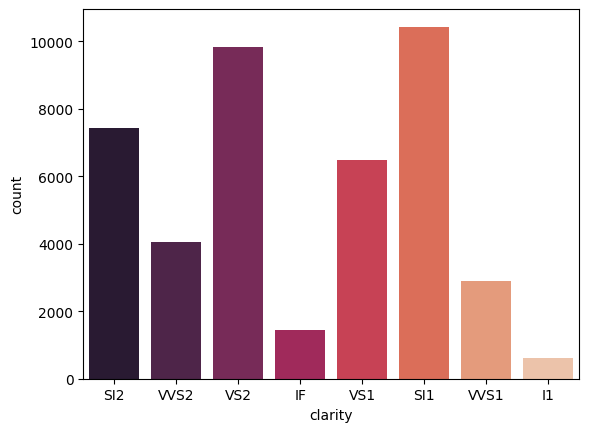

In [40]:
sns.countplot(x='clarity', data=train_data, palette='rocket');

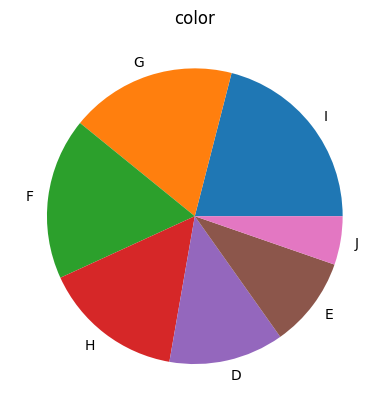

In [6]:
values = train_data['color'].value_counts()

labels = ['I', 'G', 'F', 'H', 'D', 'E', 'J']

plt.pie(values, labels = labels);

plt.title('color');

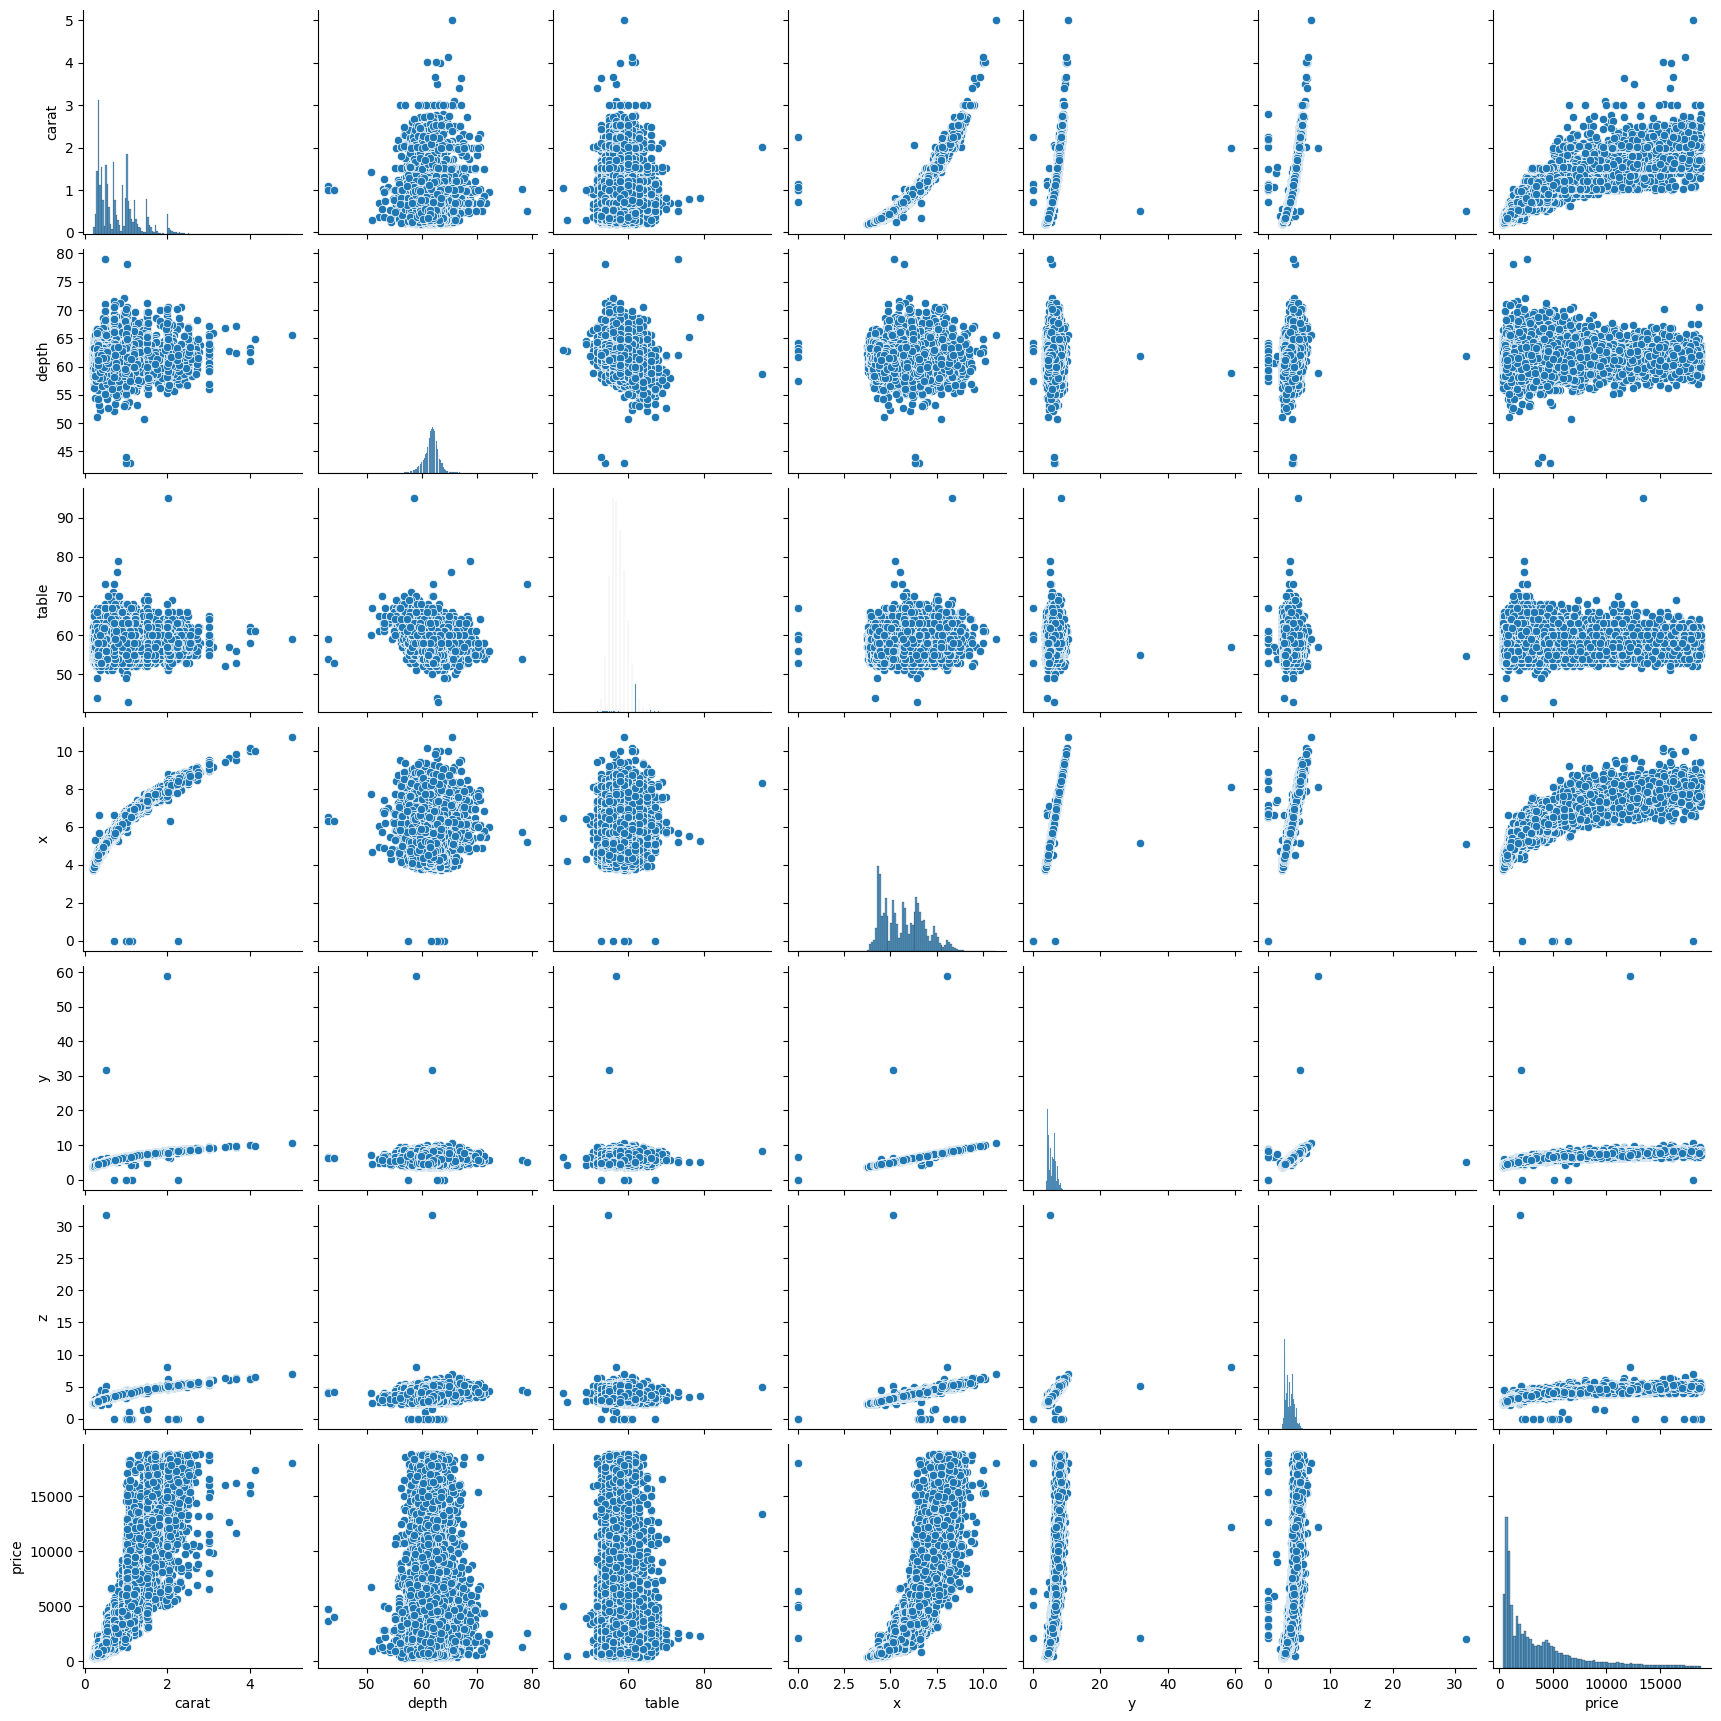

In [6]:
sns.pairplot(train_data);


### Pre-processing 

#### checking for inconsistency

In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43152 entries, 1 to 43152
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    43152 non-null  float64
 1   cut      43152 non-null  object 
 2   color    43152 non-null  object 
 3   clarity  43152 non-null  object 
 4   depth    43152 non-null  float64
 5   table    43152 non-null  float64
 6   x        43152 non-null  float64
 7   y        43152 non-null  float64
 8   z        43152 non-null  float64
 9   price    43152 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 3.6+ MB


In [7]:
train_data["cut"].unique()

array(['Ideal', 'Premium', 'Very Good', 'Fair', 'Good'], dtype=object)

In [8]:
train_data["clarity"].unique()

array(['SI2', 'VVS2', 'VS2', 'IF', 'VS1', 'SI1', 'VVS1', 'I1'],
      dtype=object)

In [9]:
train_data["color"].unique()

array(['I', 'G', 'F', 'H', 'D', 'E', 'J'], dtype=object)

* so there's no inconsistency in our data

#### checking for NaNs

In [10]:
train_data.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

* there's no null values

#### Creating new feature from exicting features

In [44]:
train_data['volume'] = train_data.x * train_data.y * train_data.z

train_data.head()

,carat,cut,color,clarity,depth,table,x,y,z,price,volume
Id,,,,,,,,,,,
1,1.06,Ideal,I,SI2,61.8,57.0,6.57,6.60,4.07,4270,176.483340
2,1.51,Premium,G,VVS2,60.9,58.0,7.38,7.42,4.51,15164,246.965796
3,0.32,Ideal,F,VS2,61.3,56.0,4.43,4.41,2.71,828,52.943373
4,0.53,Ideal,G,VS2,61.2,56.0,5.19,5.22,3.19,1577,86.422842
5,0.70,Premium,H,VVS2,61.0,57.0,5.76,5.72,3.50,2596,115.315200


#### Removing unneeded columns

In [7]:
train_data.describe(include = 'all')

,carat,cut,color,clarity,depth,table,x,y,z,price,volume
count,43152.000000,43152,43152,43152,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000
unique,NaN,5,7,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Ideal,G,SI1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,17203,9060,10428,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.797855,NaN,NaN,NaN,61.747177,57.458347,5.731568,5.735018,3.538568,3929.491912,129.852555
std,0.473594,NaN,NaN,NaN,1.435454,2.233904,1.121279,1.148809,0.708238,3985.527795,78.621399
min,0.200000,NaN,NaN,NaN,43.000000,43.000000,0.000000,0.000000,0.000000,326.000000,0.000000
25%,0.400000,NaN,NaN,NaN,61.000000,56.000000,4.710000,4.720000,2.910000,947.750000,65.135658
50%,0.700000,NaN,NaN,NaN,61.800000,57.000000,5.700000,5.710000,3.530000,2401.000000,114.832253
75%,1.040000,NaN,NaN,NaN,62.500000,59.000000,6.540000,6.540000,4.040000,5312.000000,170.844390


* we noticed that the most frequent cut in our data is the ideal cut with 39.86% 
* also the most frequent color is the G color with percentage of 20.99%
* And the most frequent degree of clearance is SI1 with percentage of 24.16%

* each of length, width and depth which presented in x,y,z can't help as independent variables, so we're going to drop them

In [45]:
train_data = train_data.loc[:, ['carat', 'cut', 'color', 'clarity', 'depth', 'table','volume','price']]
train_data

,carat,cut,color,clarity,depth,table,volume,price
Id,,,,,,,,
1,1.06,Ideal,I,SI2,61.8,57.0,176.483340,4270
2,1.51,Premium,G,VVS2,60.9,58.0,246.965796,15164
3,0.32,Ideal,F,VS2,61.3,56.0,52.943373,828
4,0.53,Ideal,G,VS2,61.2,56.0,86.422842,1577
5,0.70,Premium,H,VVS2,61.0,57.0,115.315200,2596
...,...,...,...,...,...,...,...,...
43148,0.52,Ideal,E,VS2,61.5,56.0,84.997584,1760
43149,0.72,Very Good,D,VS2,62.1,59.0,115.946550,3016
43150,0.44,Premium,I,VVS1,61.5,58.0,72.801630,990


In [9]:
train_data.select_dtypes(include = np.number).corr()

,carat,depth,table,volume,price
carat,1.000000,0.023944,0.182889,0.971061,0.921911
depth,0.023944,1.000000,-0.302794,0.004642,-0.013137
table,0.182889,-0.302794,1.000000,0.167715,0.128501
volume,0.971061,0.004642,0.167715,1.000000,0.897903
price,0.921911,-0.013137,0.128501,0.897903,1.000000


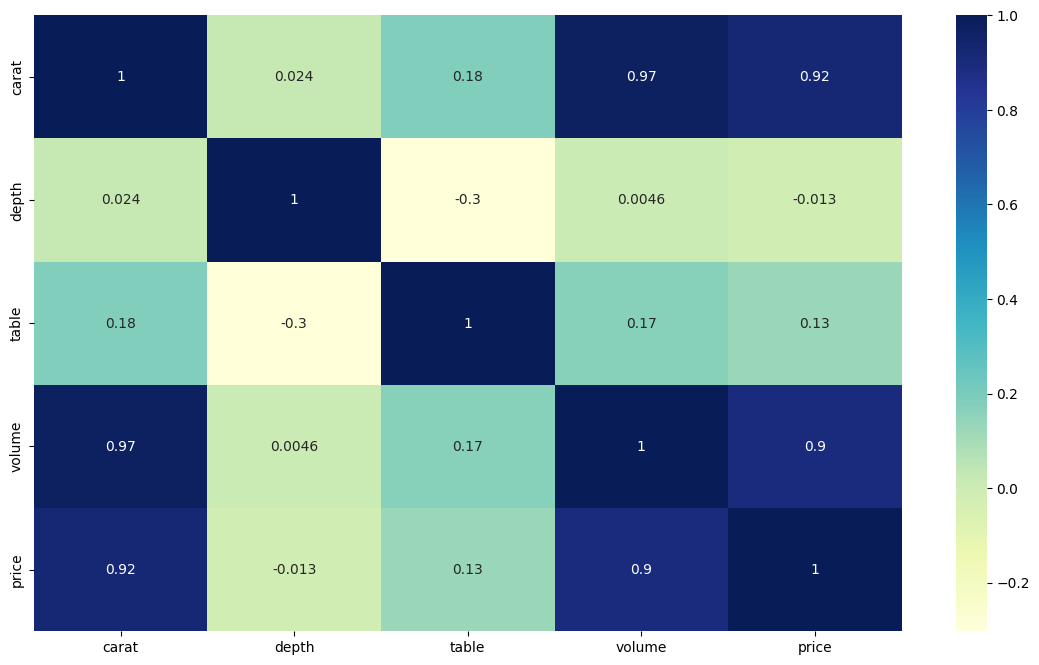

In [9]:
plt.figure(figsize=(14,8))
sns.heatmap(train_data.select_dtypes(include = np.number).corr(), cmap="YlGnBu", annot=True);

* there's strong correlation between volume and carat 

#### checking for duplicates

In [10]:
train_data[train_data.index.duplicated()]

,carat,cut,color,clarity,depth,table,volume,price
Id,,,,,,,,


* there's no duplicates

#### checking for outliers

In [11]:
for col in train_data.select_dtypes(include = np.number).columns:

    print(f"Variance of {col} is {train_data.select_dtypes(include = np.number).var()[col]}")

Variance of carat is 0.22429091935368298
Variance of depth is 2.0605278257671293
Variance of table is 4.990326373084998
Variance of volume is 6181.324435419232
Variance of price is 15884431.805825531


In [12]:
for col in train_data.select_dtypes(include=np.number).columns:
    
    if col != 'price':
        
        print(f"Skewness of {col} is {train_data[col].skew()}")


Skewness of carat is 1.1092669692482848
Skewness of depth is -0.15877853746524223
Skewness of table is 0.804091194676748
Skewness of volume is 3.4800593813292897


* seems that there's skewness in volume

<AxesSubplot: >

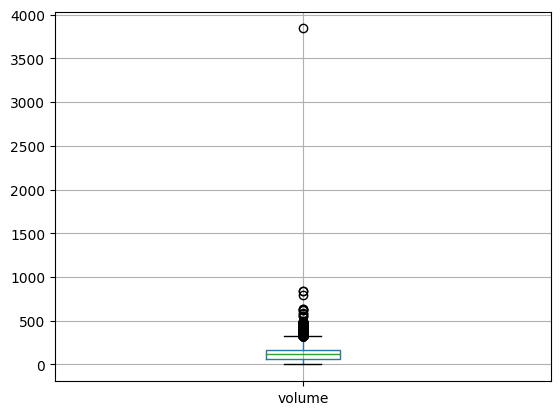

In [13]:
train_data.boxplot(column='volume')

In [46]:
train_data = train_data[(train_data['volume'] < 700)]

<AxesSubplot: >

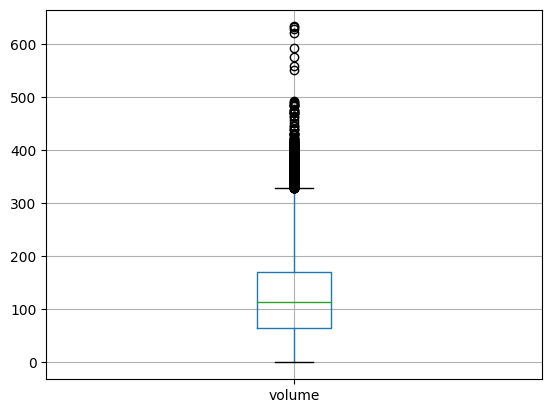

In [9]:
train_data.boxplot(column='volume')

#### feature scaling

In [31]:
scaler = StandardScaler()

train = train_data.copy()

y = train.pop('price')

train.loc[:, train.select_dtypes(include=np.number).columns] = scaler.fit_transform(train.loc[:, train.select_dtypes(include=np.number).columns]) 

train

,carat,cut,color,clarity,depth,table,volume
Id,,,,,,,
1,0.554390,Ideal,I,SI2,0.036769,-0.205503,0.612620
2,1.505552,Premium,G,VVS2,-0.590295,0.243612,1.535845
3,-1.009742,Ideal,F,VS2,-0.311600,-0.654618,-1.005586
4,-0.565867,Ideal,G,VS2,-0.381273,-0.654618,-0.567050
5,-0.206539,Premium,H,VVS2,-0.520621,-0.205503,-0.188600
...,...,...,...,...,...,...,...
43148,-0.587004,Ideal,E,VS2,-0.172252,-0.654618,-0.585719
43149,-0.164265,Very Good,D,VS2,0.245790,0.692728,-0.180330
43150,-0.756099,Premium,I,VVS1,-0.172252,0.243612,-0.745470


#### encoding

In [57]:
train = train_data.copy()
y = train.pop('price')


train.cut = train.cut.replace(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'],[1, 2, 4, 3, 5])

train.color = train.color.replace(['E', 'I', 'J', 'H', 'F', 'G', 'D'],[2, 6, 7, 5, 3, 4, 1])

train.clarity = train.clarity.replace(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],[7, 6, 4, 5, 3, 2, 8, 1])

train

,carat,cut,color,clarity,depth,table,volume
Id,,,,,,,
1,1.06,1,6,7,61.8,57.0,176.483340
2,1.51,2,4,3,60.9,58.0,246.965796
3,0.32,1,3,5,61.3,56.0,52.943373
4,0.53,1,4,5,61.2,56.0,86.422842
5,0.70,2,5,3,61.0,57.0,115.315200
...,...,...,...,...,...,...,...
43148,0.52,1,2,5,61.5,56.0,84.997584
43149,0.72,3,1,5,62.1,59.0,115.946550
43150,0.44,2,6,2,61.5,58.0,72.801630


In [6]:
## Binary Encoding using category_encoders

# train = train.copy()

# cols = train.select_dtypes(include=object).columns.tolist()

# enc = ce.BinaryEncoder(cols=cols)

# train = enc.fit_transform(train)

# train

,carat,cut_0,cut_1,cut_2,color_0,color_1,color_2,clarity_0,clarity_1,clarity_2,clarity_3,depth,table
0,0.553529,0,0,1,0,0,1,0,0,0,1,0.036799,-0.205180
1,1.503722,0,1,0,0,1,0,0,0,1,0,-0.590188,0.242472
2,-1.009010,0,0,1,0,1,1,0,0,1,1,-0.311527,-0.652832
3,-0.565586,0,0,1,0,1,0,0,0,1,1,-0.381192,-0.652832
4,-0.206625,0,1,0,1,0,0,0,0,1,0,-0.520523,-0.205180
...,...,...,...,...,...,...,...,...,...,...,...,...,...
43147,-0.586702,0,0,1,1,1,0,0,0,1,1,-0.172197,-0.652832
43148,-0.164394,0,1,1,1,0,1,0,0,1,1,0.245795,0.690124
43149,-0.755625,0,1,0,0,0,1,0,1,1,1,-0.172197,0.242472
43150,-1.030125,0,1,0,1,1,0,0,1,0,1,-1.077844,0.242472


#### model

In [48]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import PolynomialFeatures

import sklearn.ensemble as se

from xgboost import XGBRegressor

from sklearn import linear_model


#### Lasso reg 

In [35]:
lasso = linear_model.Lasso(alpha=0.4)

In [36]:
lasso.fit(train, y)

Lasso(alpha=0.4)

#### decision tree reg

In [11]:
import sklearn.tree as st

tree = st.DecisionTreeRegressor(random_state=42)

tree.fit(train, y)

DecisionTreeRegressor(random_state=42)

#### Random_forest_reg

In [40]:
rf = se.RandomForestRegressor(n_estimators=100,
                              random_state=42)

rf.fit(train, y)

RandomForestRegressor(random_state=42)

#### XGboost

In [50]:
xgb_regressor = XGBRegressor(random_state=42)

xgb = xgb_regressor.fit(train, y)

xgb

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

#### poly_reg 

In [11]:
poly = PolynomialFeatures(degree=3, include_bias=False)

In [12]:
poly_features = poly.fit_transform(train)

In [13]:
poly_reg_model = LinearRegression()

In [14]:
poly_reg_model.fit(poly_features, y)

LinearRegression()

### test data

In [51]:
test_data = test_data.set_index('Id')

test_data['volume'] = test_data.x * test_data.y * test_data.z

test_data = test_data.loc[:, ['carat', 'cut', 'color', 'clarity', 'depth', 'table','volume']]

test_data

,carat,cut,color,clarity,depth,table,volume
Id,,,,,,,
1,0.34,Ideal,G,VVS2,61.1,57.0,55.686400
2,0.71,Premium,E,VS2,62.7,58.0,116.719456
3,0.44,Very Good,I,VS1,62.8,56.0,71.889720
4,0.81,Premium,E,SI2,60.1,59.0,134.037855
5,0.40,Ideal,G,VVS1,61.2,56.0,66.435840
...,...,...,...,...,...,...,...
10784,0.57,Ideal,H,VS1,60.9,56.0,93.309024
10785,1.05,Ideal,G,VS2,60.8,57.0,175.903140
10786,0.71,Ideal,E,VVS1,62.3,55.0,115.338080


In [30]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10788 entries, 1 to 10788
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    10788 non-null  float64
 1   cut      10788 non-null  object 
 2   color    10788 non-null  object 
 3   clarity  10788 non-null  object 
 4   depth    10788 non-null  float64
 5   table    10788 non-null  float64
 6   volume   10788 non-null  float64
dtypes: float64(4), object(3)
memory usage: 674.2+ KB


In [36]:
# feature scaling

test = test_data.copy()

scaler = StandardScaler()

test.loc[:, test.select_dtypes(include=np.number).columns] = scaler.fit_transform(test.loc[:, test.select_dtypes(include=np.number).columns]) 



In [56]:
# encoding
test = test_data.copy()

test.cut = test.cut.replace(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'],[1, 2, 4, 3, 5])

test.color = test.color.replace(['E', 'I', 'J', 'H', 'F', 'G', 'D'],[2, 6, 7, 5, 3, 4, 1])

test.clarity = test.clarity.replace(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],[7, 6, 4, 5, 3, 2, 8, 1])

test

,carat,cut,color,clarity,depth,table,volume
Id,,,,,,,
1,0.34,1,4,3,61.1,57.0,55.686400
2,0.71,2,2,5,62.7,58.0,116.719456
3,0.44,3,6,4,62.8,56.0,71.889720
4,0.81,2,2,7,60.1,59.0,134.037855
5,0.40,1,4,2,61.2,56.0,66.435840
...,...,...,...,...,...,...,...
10784,0.57,1,5,4,60.9,56.0,93.309024
10785,1.05,1,4,5,60.8,57.0,175.903140
10786,0.71,1,2,2,62.3,55.0,115.338080


In [13]:
# encoding
# test = test.copy()

# cols = test.select_dtypes(include=object).columns.tolist()

# enc = ce.BinaryEncoder(cols=cols)

# test = enc.fit_transform(test)

# test

,carat,cut_0,cut_1,cut_2,color_0,color_1,color_2,clarity_0,clarity_1,clarity_2,clarity_3,depth,table
Id,,,,,,,,,,,,,
1,-0.963422,0,0,1,0,0,1,0,0,0,1,-0.463211,-0.202309
2,-0.185585,0,1,0,0,1,0,0,0,1,0,0.662599,0.244752
3,-0.753196,0,1,1,0,1,1,0,0,1,1,0.732962,-0.649370
4,0.024641,0,1,0,0,1,0,0,1,0,0,-1.166841,0.691814
5,-0.837286,0,0,1,0,0,1,0,1,0,1,-0.392847,-0.649370
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10784,-0.479902,0,0,1,1,1,0,0,0,1,1,-0.603937,-0.649370
10785,0.529184,0,0,1,0,0,1,0,0,1,0,-0.674300,-0.202309
10786,-0.185585,0,0,1,0,1,0,0,1,0,1,0.381146,-1.096431


### prediction

In [17]:
poly_pred = poly_reg_model.predict(test)

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


ValueError: X has 7 features, but LinearRegression is expecting 119 features as input.

In [15]:
tree_pred = tree.predict(test)

In [16]:
tree_pred.reshape(-1,1)

array([[  775.],
       [ 3024.],
       [  813.],
       ...,
       [ 5056.],
       [ 4967.],
       [13387.]])

In [41]:
rf_pred = rf.predict(test)

In [42]:
rf_pred.reshape(-1,1)

array([[  818.43      ],
       [ 2972.16      ],
       [  929.11      ],
       ...,
       [ 4593.84      ],
       [ 4655.93083333],
       [13744.77      ]])

In [53]:
xgb_pred = xgb.predict(test)

In [54]:
xgb_pred.reshape(-1,1)

array([[  774.8996],
       [ 2898.8528],
       [  794.7363],
       ...,
       [ 4202.207 ],
       [ 4783.8027],
       [14313.649 ]], dtype=float32)

In [37]:
lasso_pred = lasso.predict(test)

In [38]:
lasso_pred.reshape(-1,1)

array([[  969.78907013],
       [ 3613.61529143],
       [  407.7744377 ],
       ...,
       [ 5369.80853167],
       [ 6089.66804537],
       [13505.67139515]])

In [55]:
final_final = pd.DataFrame(xgb_pred, columns =['price']) 

final_final.index = np.arange(1, len(final_final) + 1)

final_final.index.names = ['Id']
final_final.to_csv('submission.csv')